## Prediction for bike_sharing_daily dataset

Times series dataset - predict bike rental count daily based
on the environmental and seasonal settings

### Problem statement

Predication of bike rental count hourly or daily based on the environmental and seasonal settings.


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
bike_sharing_daily = pd.read_csv('bike_sharing_daily.csv')
bike_sharing_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
bike_sharing_daily.shape

(731, 16)

In [ ]:
bike_sharing_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
bike_sharing_daily.describe()

## avg casual is 848
## avg registered is 3656
## avg count is 4504

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
cols = ['season','mnth','yr', 'holiday', 'weekday','workingday', 'weathersit']

for i in cols:
    unique = bike_sharing_daily[i].unique()
    print(i, unique)

season [1 2 3 4]
mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
yr [0 1]
holiday [0 1]
weekday [6 0 1 2 3 4 5]
workingday [0 1]
weathersit [2 1 3]


<Axes: >

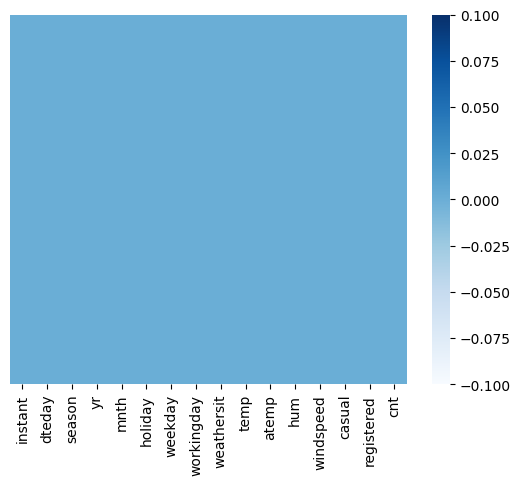

In [ ]:
sns.heatmap(bike_sharing_daily.isnull(),yticklabels = False, cmap="Blues")

In [ ]:
# bike_sharing_hourly = pd.read_csv('bike_sharing_hourly.csv')
# bike_sharing_hourly.head()

# print(bike_sharing_hourly.shape)

In [ ]:
# converting into datetime
bike_sharing_daily['dteday'] = pd.to_datetime(bike_sharing_daily['dteday'] )

In [ ]:
bike_sharing_daily['dteday'].dtypes

dtype('<M8[ns]')

In [ ]:
## we have two years of data 2011 and 2012
bike_sharing_daily['dteday'].dt.year.unique()

array([2011, 2012])

In [ ]:
len(bike_sharing_daily)

731

In [ ]:
bike_sharing_daily['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

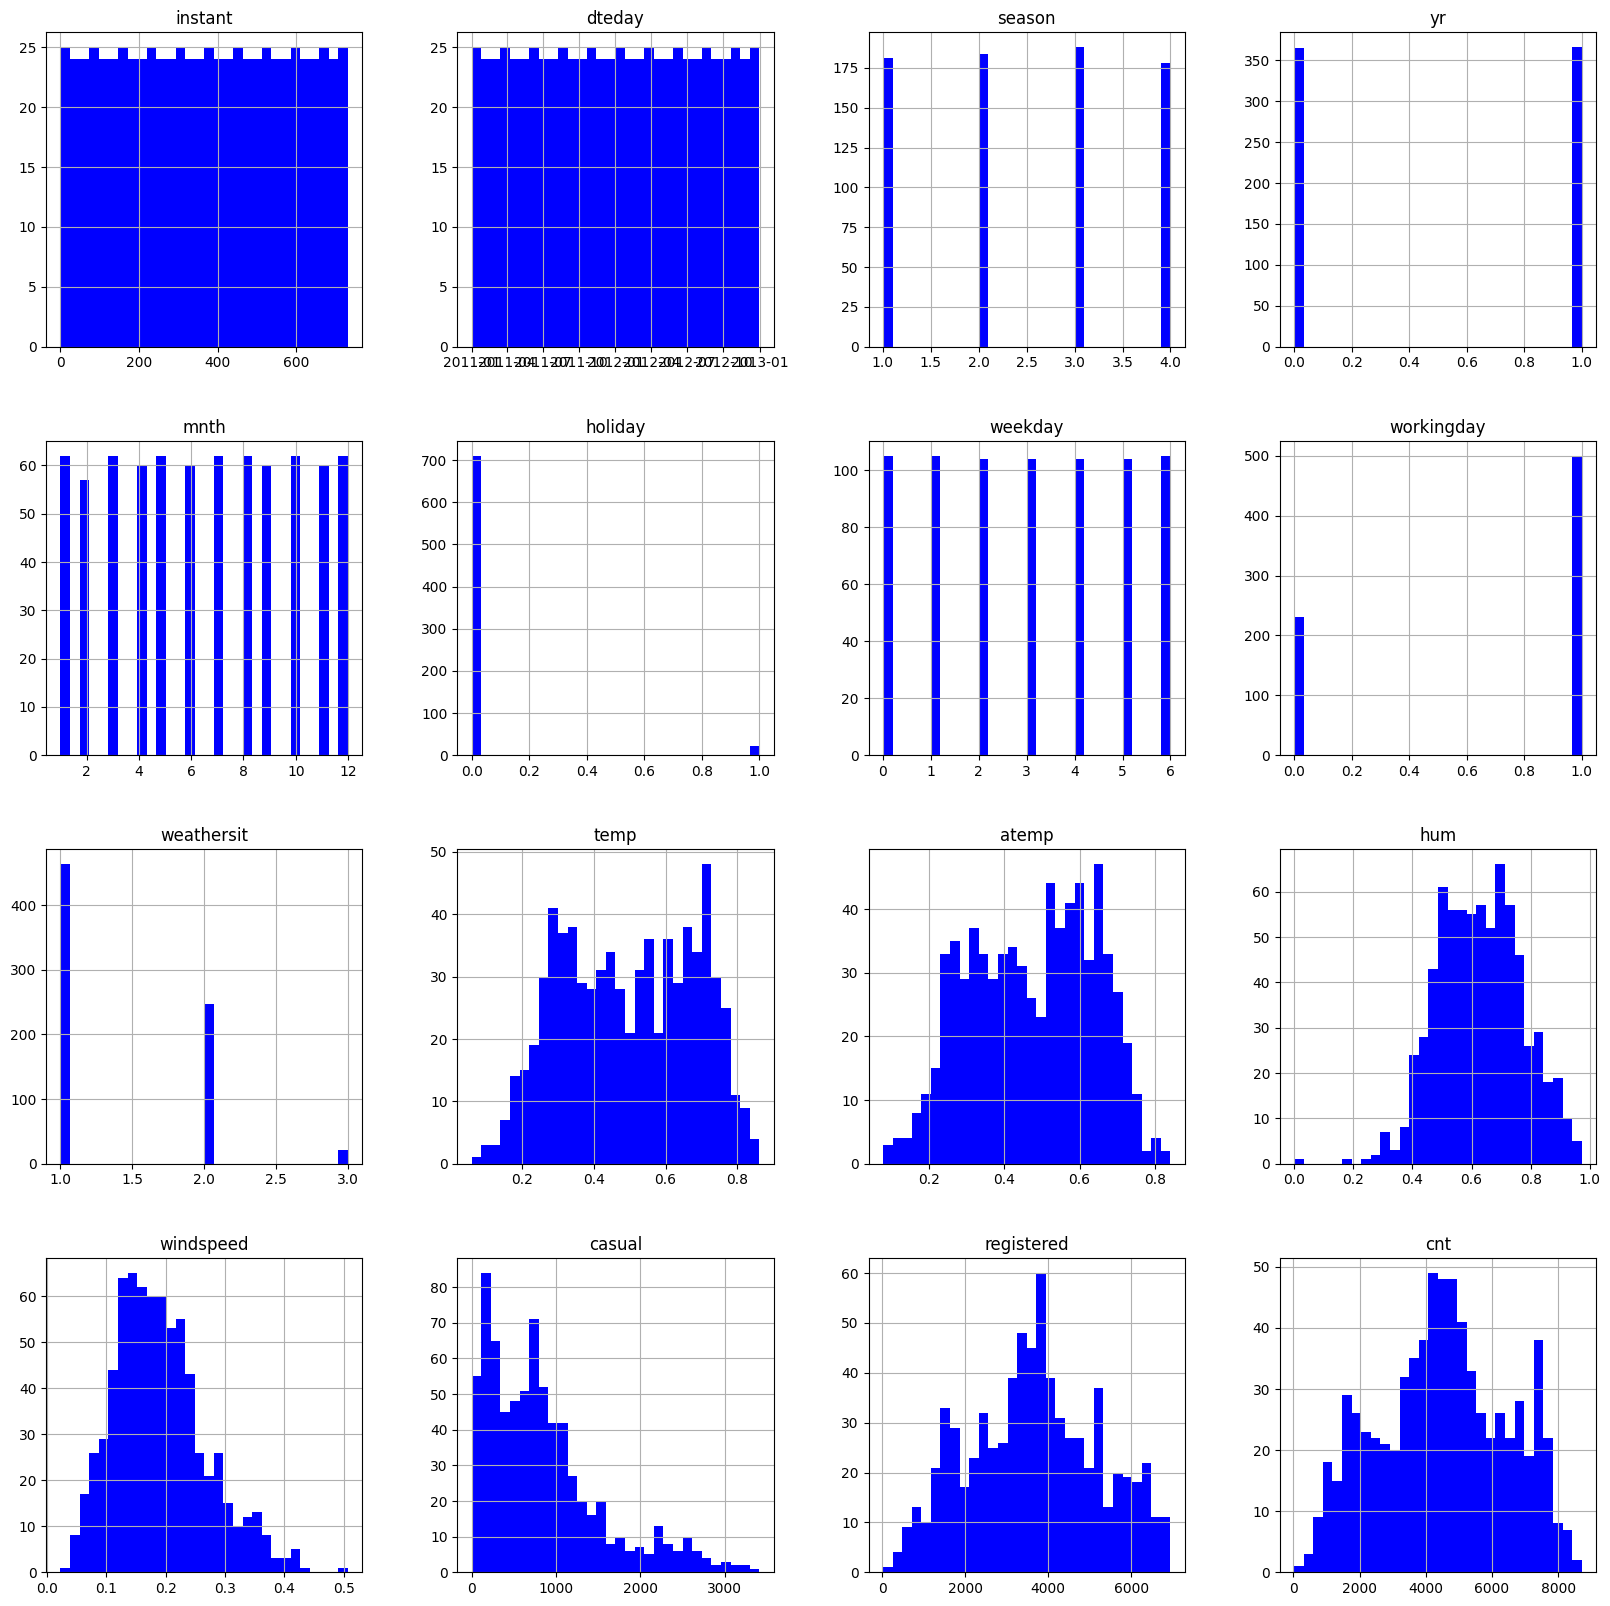

In [ ]:
## histogram of data
bike_sharing_daily.hist(bins=30, figsize=(20,20), color='b')

## all four seasons and weekdays are almost evenly distributed. (1:springer, 2:summer, 3:fall, 4:winter)
## 68.39% people are rented bicycles mostly on working days.
## majority people are rented bicycle when the wheather is Clear, Few clouds, Partly cloudy, Partly cloudy.
## daily count of registerd users are normaly distributed while most of the casual users are between 2 to 1000

Count of Registerd bikes users seems more as compared to the casual bik users.
There are very few holidays over the time for which data has been taken.
All the weekdays has similar distribution but slight difference is observed if we look
seasonaly or monthly.
Large variation is observed for weather conditions including temperature,humidity
and windpeed.

In [ ]:
correlation = bike_sharing_daily.corr()['cnt'].sort_values()
correlation

<ipython-input-13-33c17244b73c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = bike_sharing_daily.corr()['cnt'].sort_values()


weathersit   -0.297391
windspeed    -0.234545
hum          -0.100659
holiday      -0.068348
workingday    0.061156
weekday       0.067443
mnth          0.279977
season        0.406100
yr            0.566710
temp          0.627494
instant       0.628830
atemp         0.631066
casual        0.672804
registered    0.945517
cnt           1.000000
Name: cnt, dtype: float64

weather fectors like temprature, season are also correlated with cnt.
registered user and casual correlated with cnt.
registered users is positively correlated with season and temp. we clearly see that Counts of users are depend on weather.

<ipython-input-14-8ea58c34f32e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = bike_sharing_daily.corr()


<Axes: >

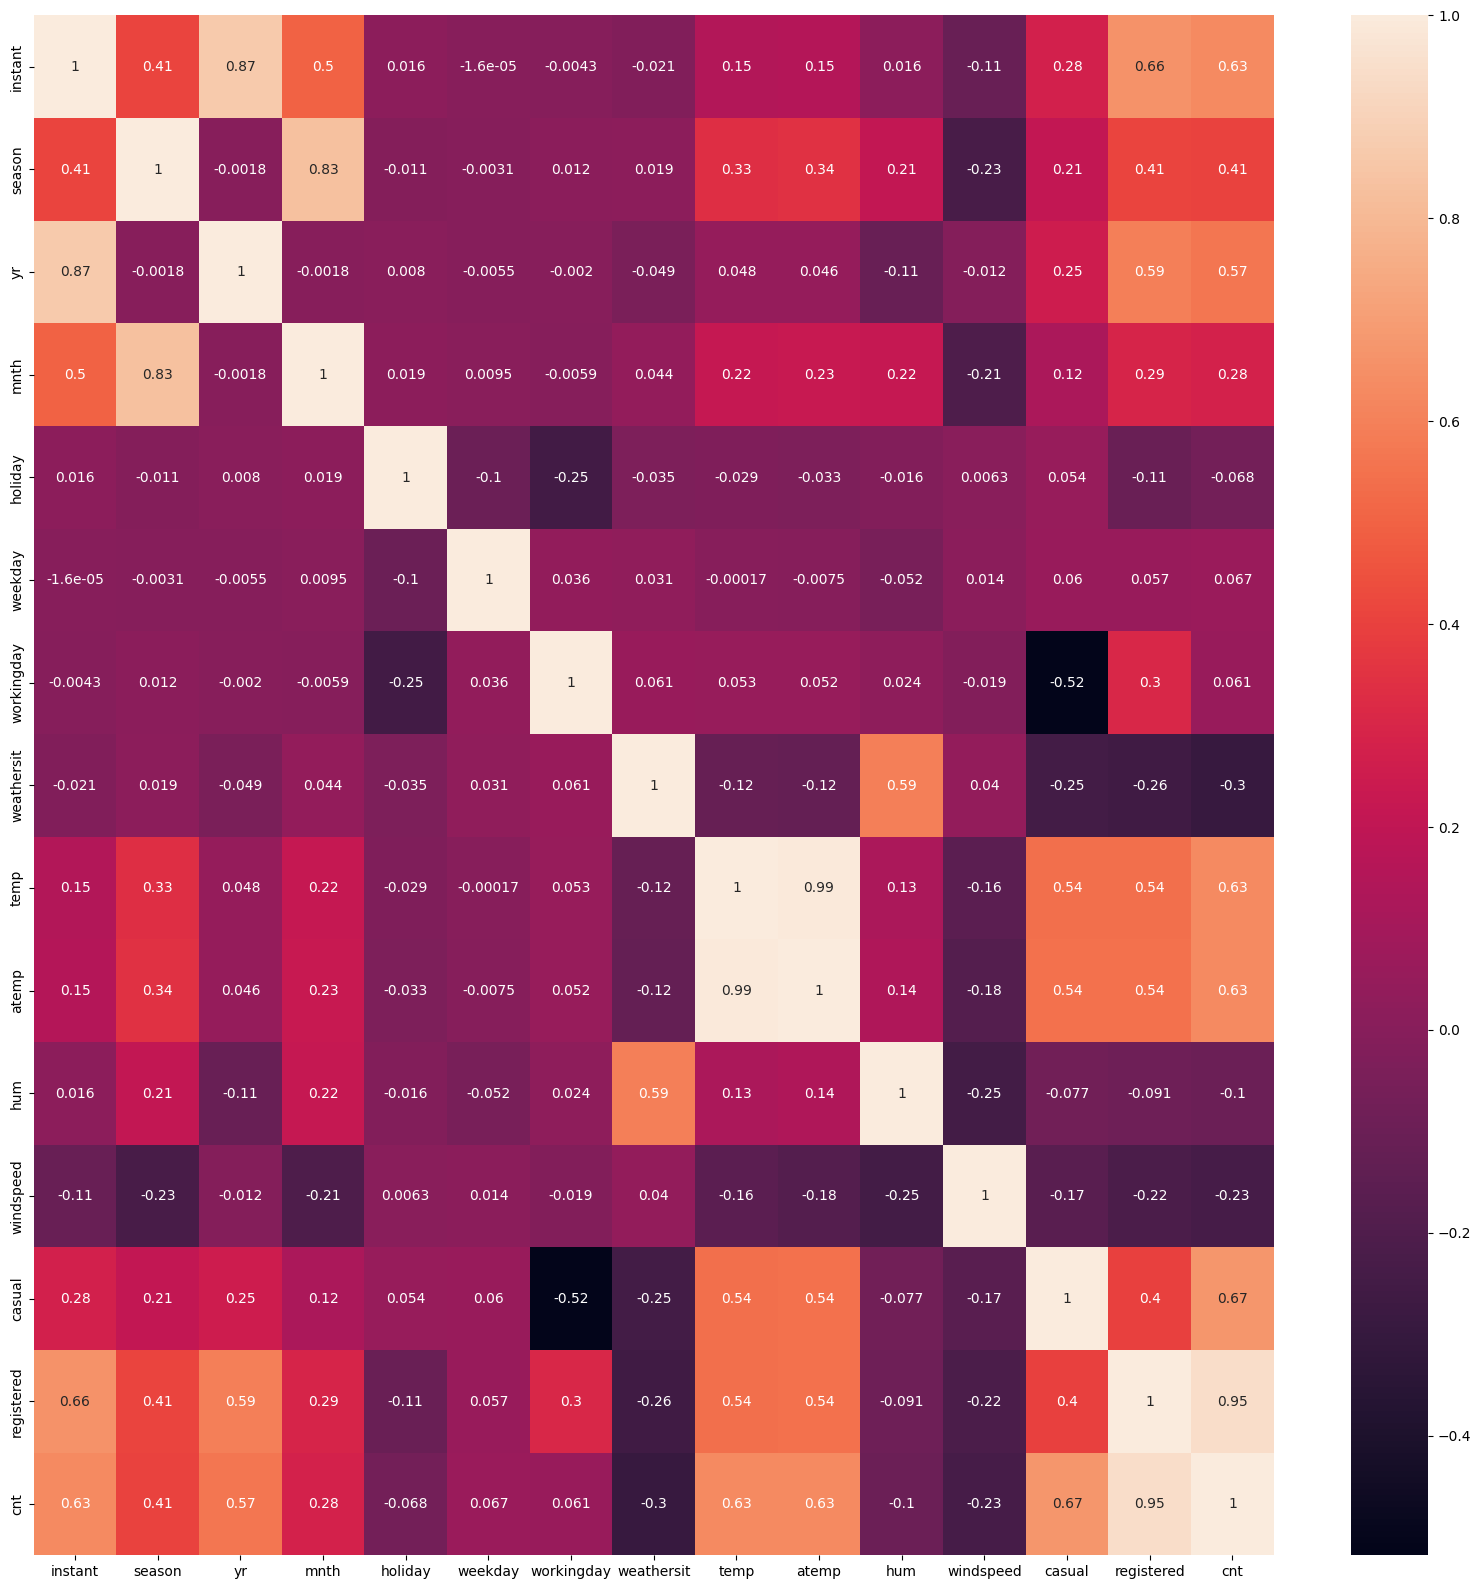

In [ ]:
correlation = bike_sharing_daily.corr()
correlation

plt.figure(figsize=[20,20])
sns.heatmap(correlation, annot = True)

In [ ]:
bike_sharing_daily['temp']

0      0.344167
1      0.363478
2      0.196364
3      0.200000
4      0.226957
         ...   
726    0.254167
727    0.253333
728    0.253333
729    0.255833
730    0.215833
Name: temp, Length: 731, dtype: float64

In [ ]:
bike_sharing_daily['year'] = pd.DatetimeIndex(bike_sharing_daily['dteday']).year
bike_sharing_daily['month'] = pd.DatetimeIndex(bike_sharing_daily['dteday']).month
bike_sharing_daily['day'] = pd.DatetimeIndex(bike_sharing_daily['dteday']).day

In [ ]:
bike_sharing_daily['month']

0       1
1       1
2       1
3       1
4       1
       ..
726    12
727    12
728    12
729    12
730    12
Name: month, Length: 731, dtype: int64

Text(0.5, 1.0, 'registered user')

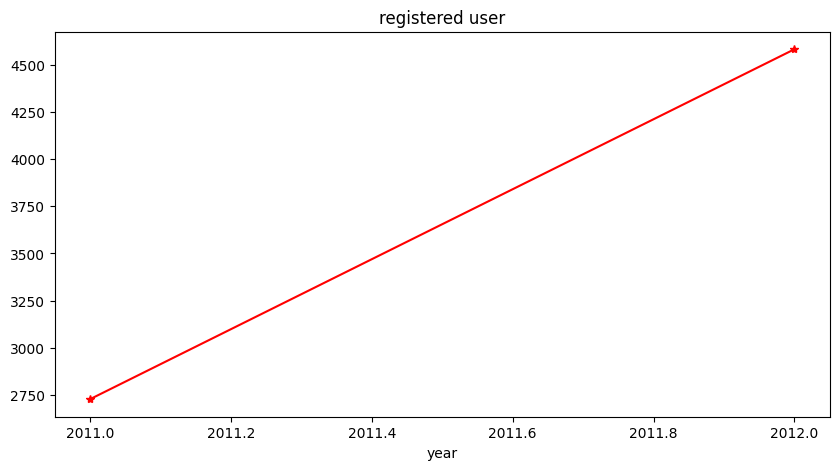

In [ ]:
axis = bike_sharing_daily.groupby('year')['registered'].mean().plot(figsize = (10,5), marker = '*', color = 'r')
axis.set_title('registered user')

Text(0.5, 1.0, 'registered user')

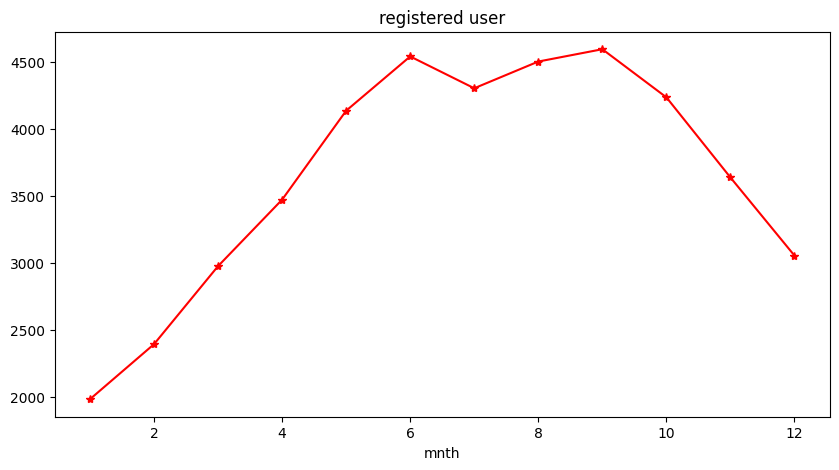

In [ ]:
axis = bike_sharing_daily.groupby('mnth')['registered'].mean().plot(figsize = (10,5), marker = '*', color = 'r')
axis.set_title('registered user')

Text(0.5, 1.0, 'Daily registered user')

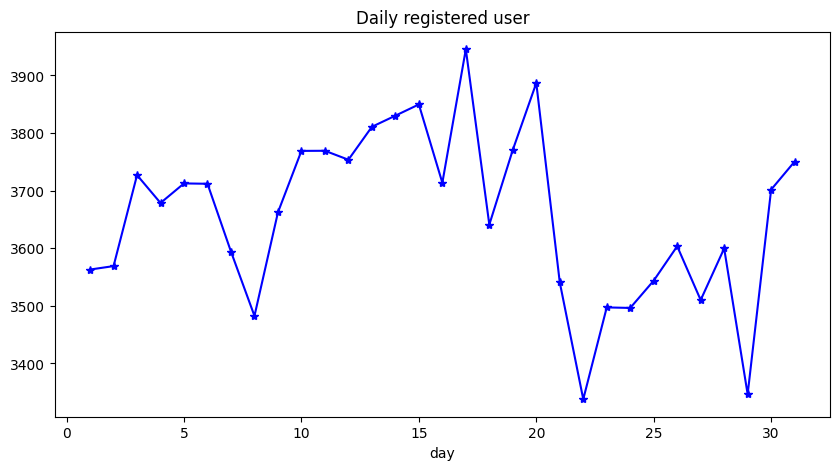

In [ ]:
axis = bike_sharing_daily.groupby('day')['registered'].mean().plot(figsize = (10,5), marker = '*', color = 'b')
axis.set_title('Daily registered user')

as we see Yearly there is increase in user count.
User count increases in mid month but decrease as approaches to the year end. user counts increase in summar and fall season.
User count shows a lot of variation during days 30 days of month, on a mid month the counts is increasing.

Text(0.5, 1.0, 'casual user')

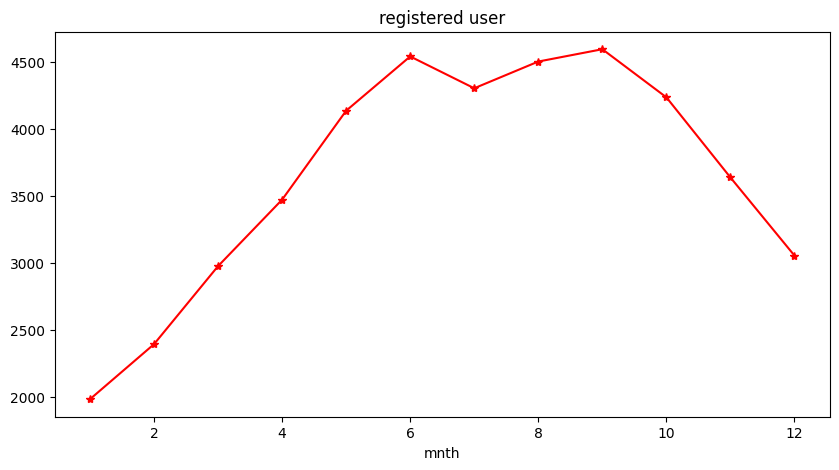

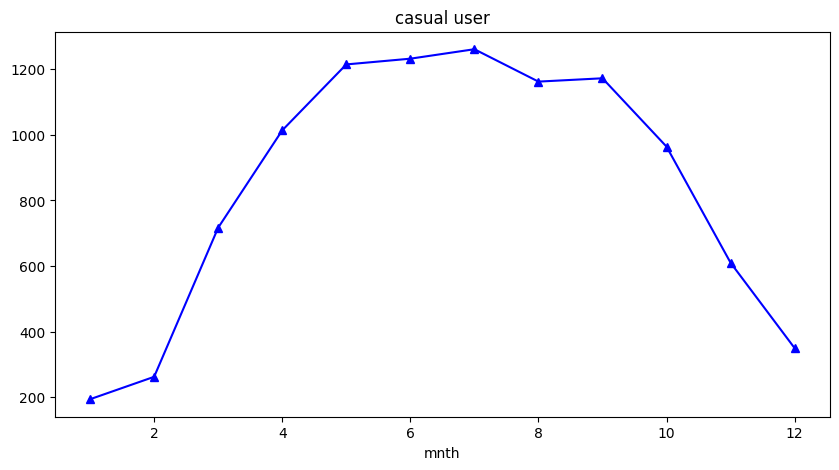

In [ ]:
axis = bike_sharing_daily.groupby('mnth')['registered'].mean().plot(figsize = (10,5), marker = '*', color = 'r')
axis.set_title('registered user')

plt.figure()
axis = bike_sharing_daily.groupby('mnth')['casual'].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('casual user')

summer and fall users are increasing.

Text(0.5, 1.0, 'casual user')

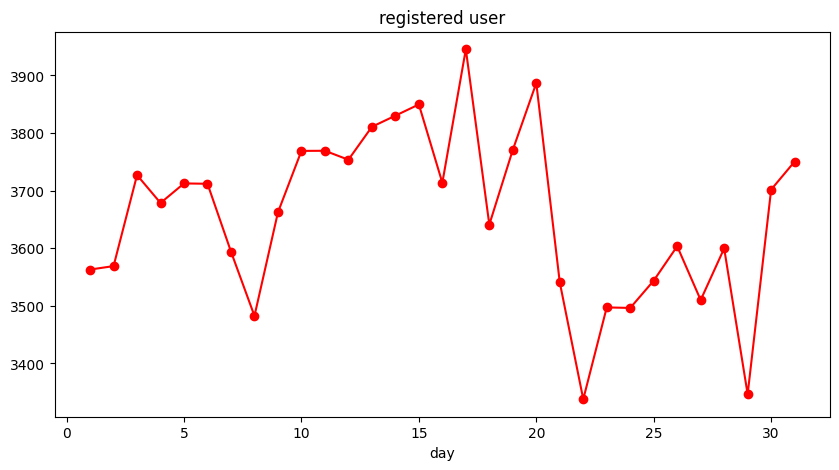

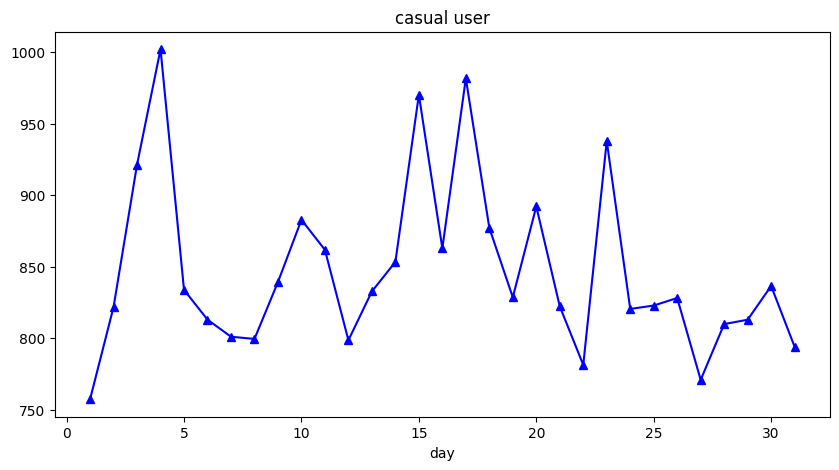

In [ ]:
axis = bike_sharing_daily.groupby('day')['registered'].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('registered user')

plt.figure()
axis = bike_sharing_daily.groupby('day')['casual'].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('casual user')

In [ ]:
#  there are more registered user as compare to casual user and they varied differently during the month

<Axes: xlabel='weekday'>

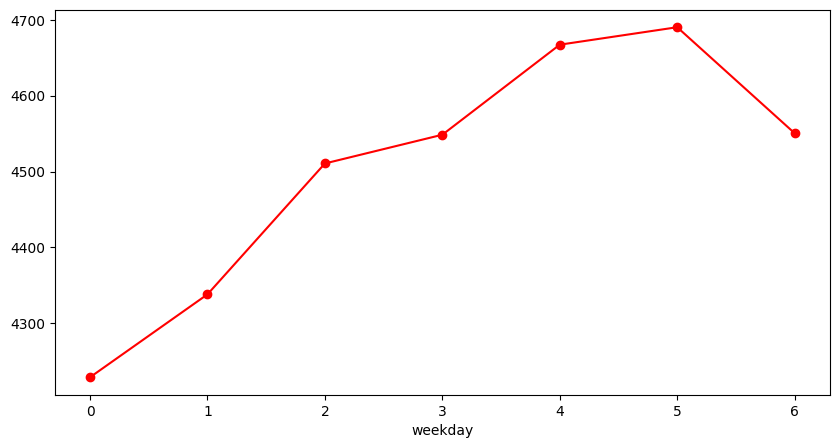

In [ ]:
bike_sharing_daily.groupby('weekday')['cnt'].mean().plot(figsize = (10,5), marker = 'o', color = 'r')

<ipython-input-68-4462a357be30>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 1.0, 'Season wise user count')

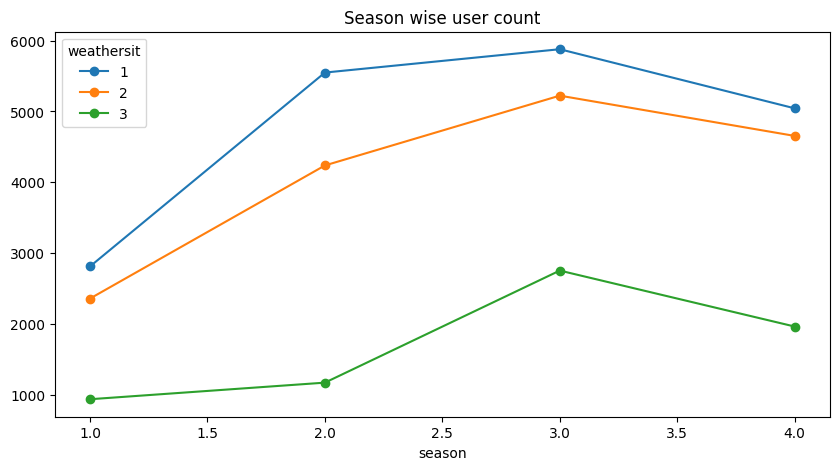

In [ ]:
bike_sharing_daily.groupby(['season','weathersit']).mean()['cnt'].unstack().plot(figsize = (10,5), marker = 'o')
plt.title('Season wise user count')

when the weather is Clear, Few clouds, Partly cloudy, Partly cloudy users there is an increase in users.

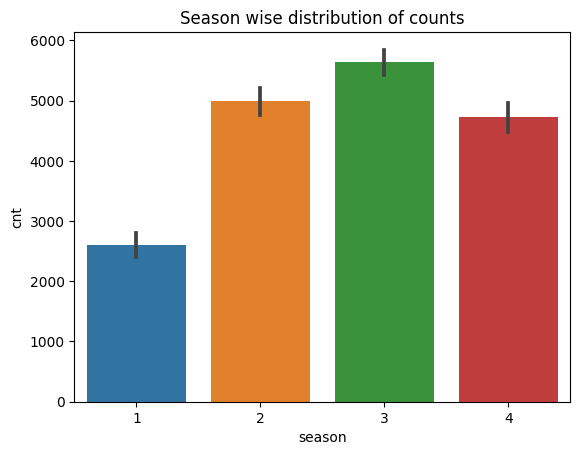

In [ ]:
sns.barplot(x='season', y='cnt',data=bike_sharing_daily)
plt.title('Season wise distribution of counts')
plt.show()


### Facebook Prophet

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet
import numpy as np
np.float = float
np.int = int

In [ ]:
def sales_prediction(sales_df, periods):
  # Function that takes in the data frame, and number of future period forecast
  # The function then generates date/count columns in Prophet format
  # The function then makes time series predictions

  ## for prophet we rename the datetime column as 'ds' (represent on x-axis) and numerical column as 'y'.
  sales_df = sales_df[['dteday', 'cnt']].rename(columns = {'dteday': 'ds', 'cnt':'y'})
  sales_df = sales_df.sort_values('ds')

  # intialize model
  model = Prophet(daily_seasonality=True)
  # fit the df into model
  model.fit(sales_df)
  # we use 'make_future_dataframe' in-built function to create a future dates of particular periods i.e, 60 days
  future   = model.make_future_dataframe(periods=periods)
  # use predict method for prediction
  forecast = model.predict(future)
  # plot the model
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  ## plot the model to show weekly, yearly and daily prediction and trend line
  figure2  = model.plot_components(forecast)

In [ ]:
# # we can what additive term the model can detects whether it is yearly, monthly or daily
# model.component_modes

In [ ]:
# ## check future dataframe - append future 60 days
# future.tail()

In [ ]:
# # we can see prediction dataframe (y^lower,y^upper,y^ )
# forecast.head()

### Prediction for next 60 days

DEBUG:cmdstanpy:input tempfile: /tmp/tmprrr6_tny/kp19rhol.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprrr6_tny/xgzv8rmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77244', 'data', 'file=/tmp/tmprrr6_tny/kp19rhol.json', 'init=/tmp/tmprrr6_tny/xgzv8rmr.json', 'output', 'file=/tmp/tmprrr6_tny/prophet_modelesy3_ghh/prophet_model-20230608163842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


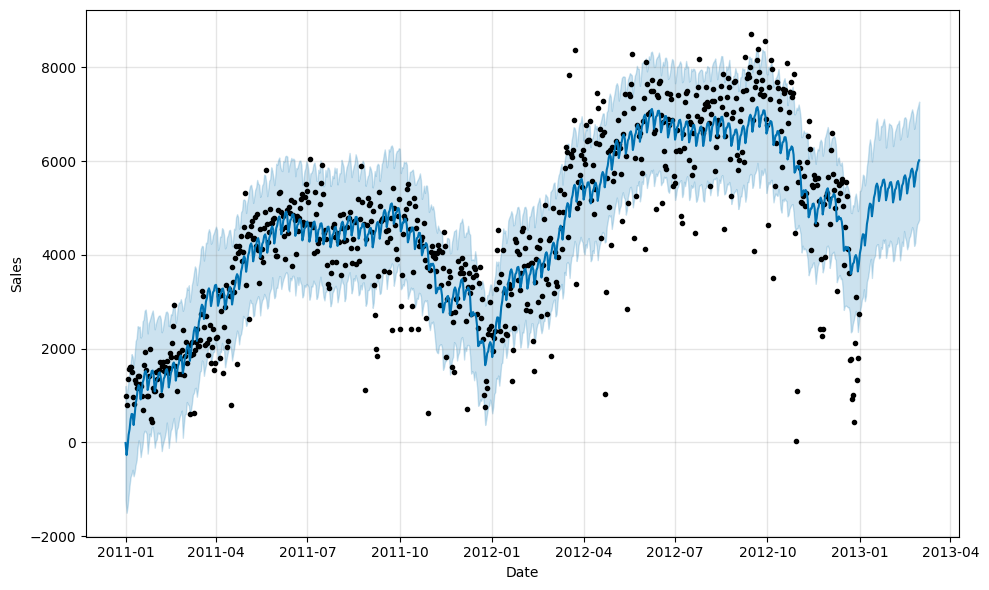

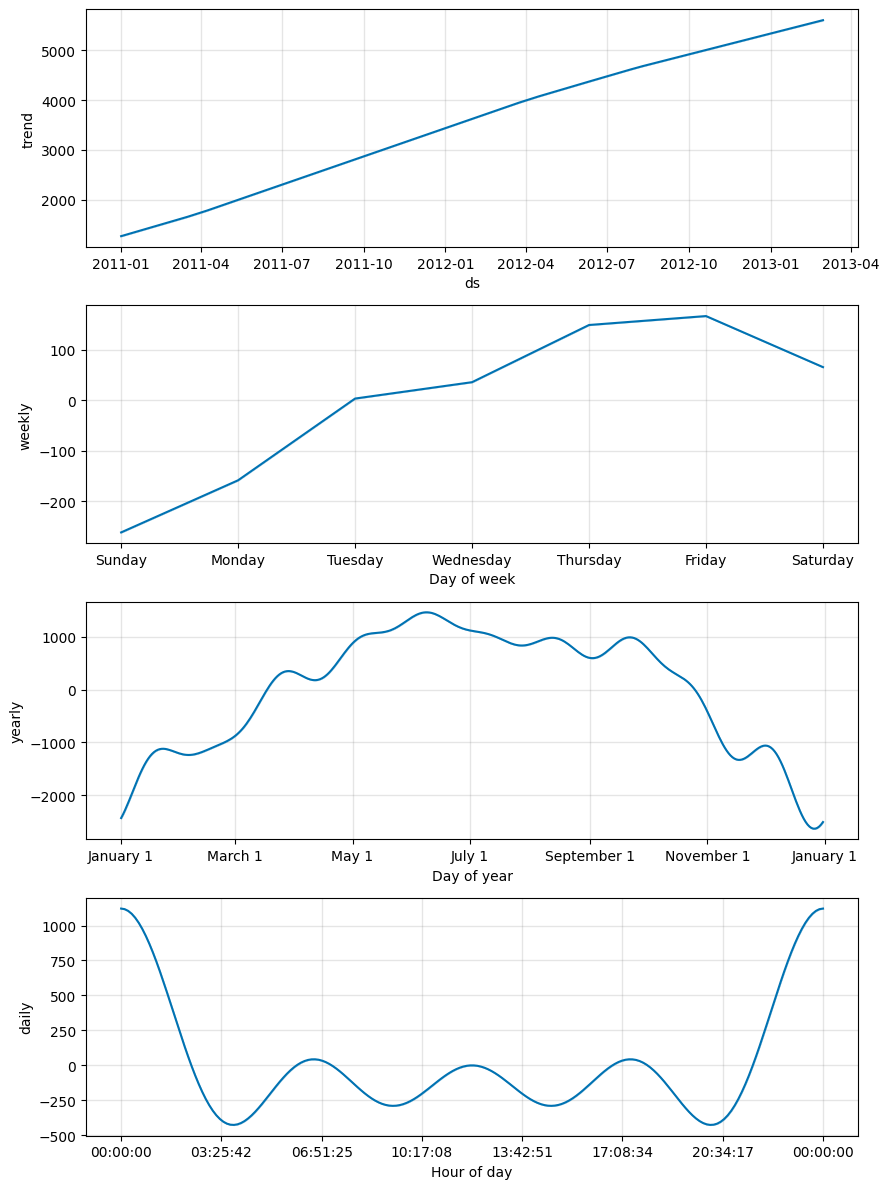

In [ ]:
sales_prediction(bike_sharing_daily, 60)

## black points are actual data points, dark blue line is projection, and in the last it shows prediction.

### Month wise daily prediction

In [ ]:
def sales_prediction(month, sales_df, periods):
  sales_df = sales_df[ sales_df['mnth'] == month ]
  sales_df = sales_df[['dteday', 'cnt']].rename(columns = {'dteday': 'ds', 'cnt':'y'})
  sales_df = sales_df.sort_values('ds')

  model    = Prophet(daily_seasonality=True)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='count')
  figure2  = model.plot_components(forecast)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsv7f_9f/hw8o7j24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsv7f_9f/hg93s25i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8086', 'data', 'file=/tmp/tmpdsv7f_9f/hw8o7j24.json', 'init=/tmp/tmpdsv7f_9f/hg93s25i.json', 'output', 'file=/tmp/tmpdsv7f_9f/prophet_model166c6yvn/prophet_model-20230602061922.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:19:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:19:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


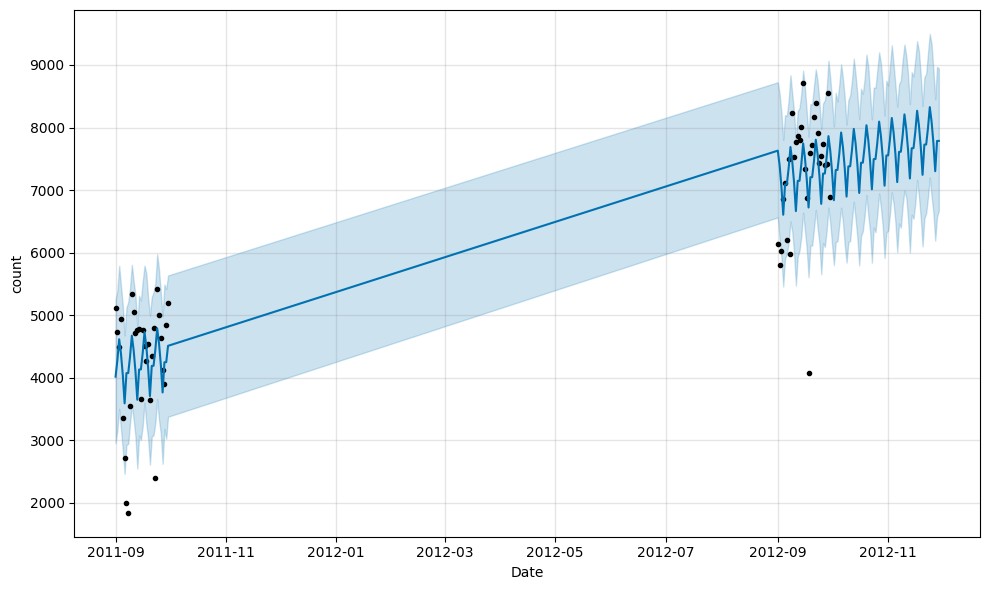

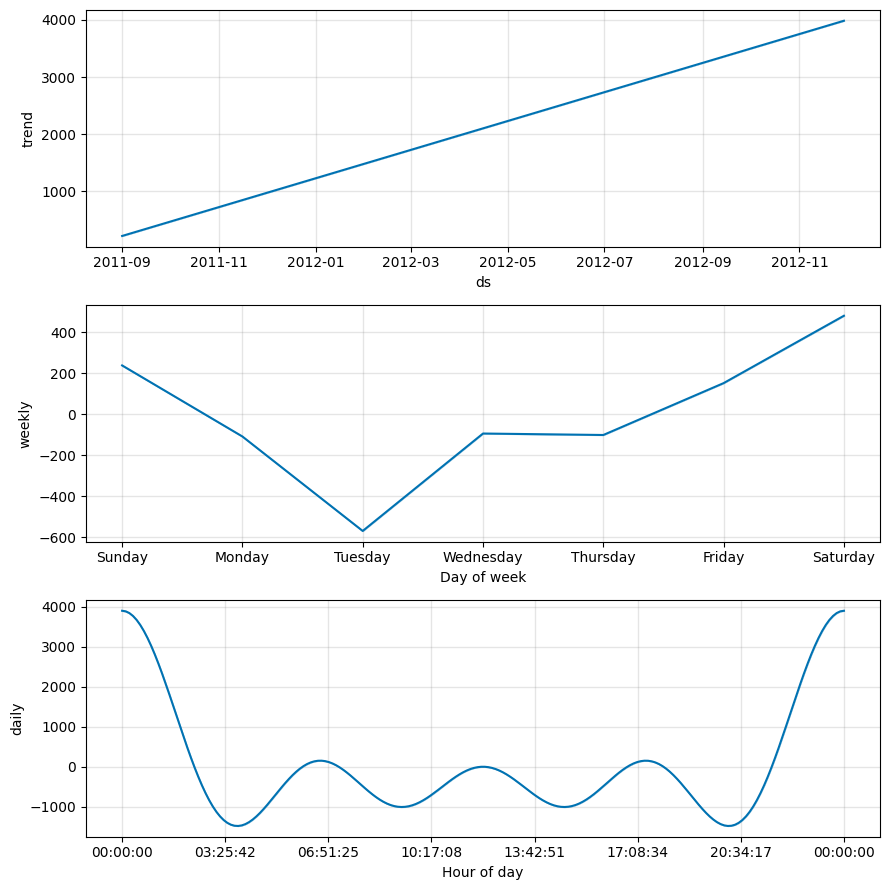

In [ ]:
sales_prediction(9,bike_sharing_daily, 60)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsv7f_9f/q65p3c7w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsv7f_9f/ov3xa3nr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20850', 'data', 'file=/tmp/tmpdsv7f_9f/q65p3c7w.json', 'init=/tmp/tmpdsv7f_9f/ov3xa3nr.json', 'output', 'file=/tmp/tmpdsv7f_9f/prophet_modellj225b21/prophet_model-20230602061959.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


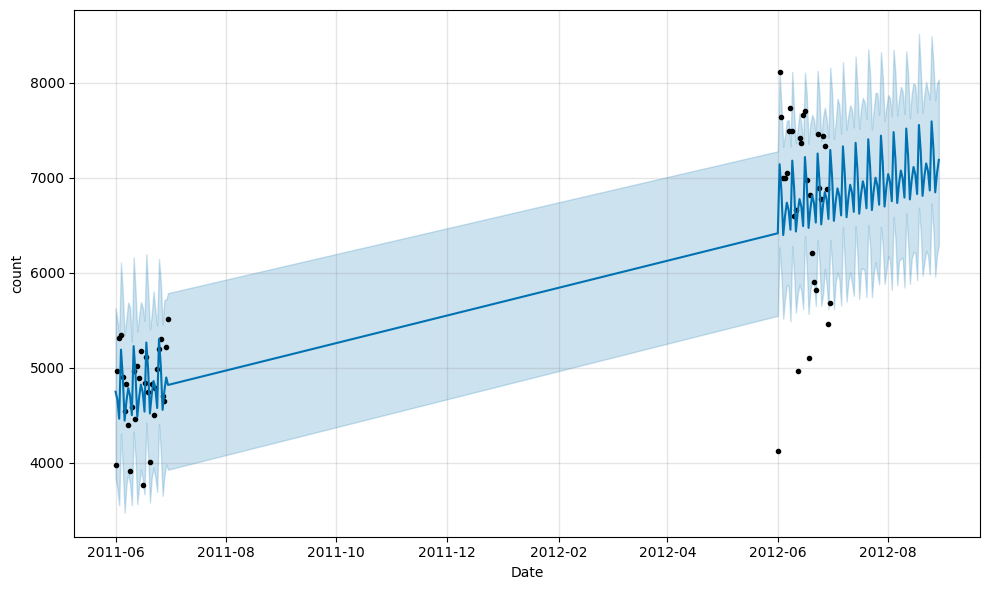

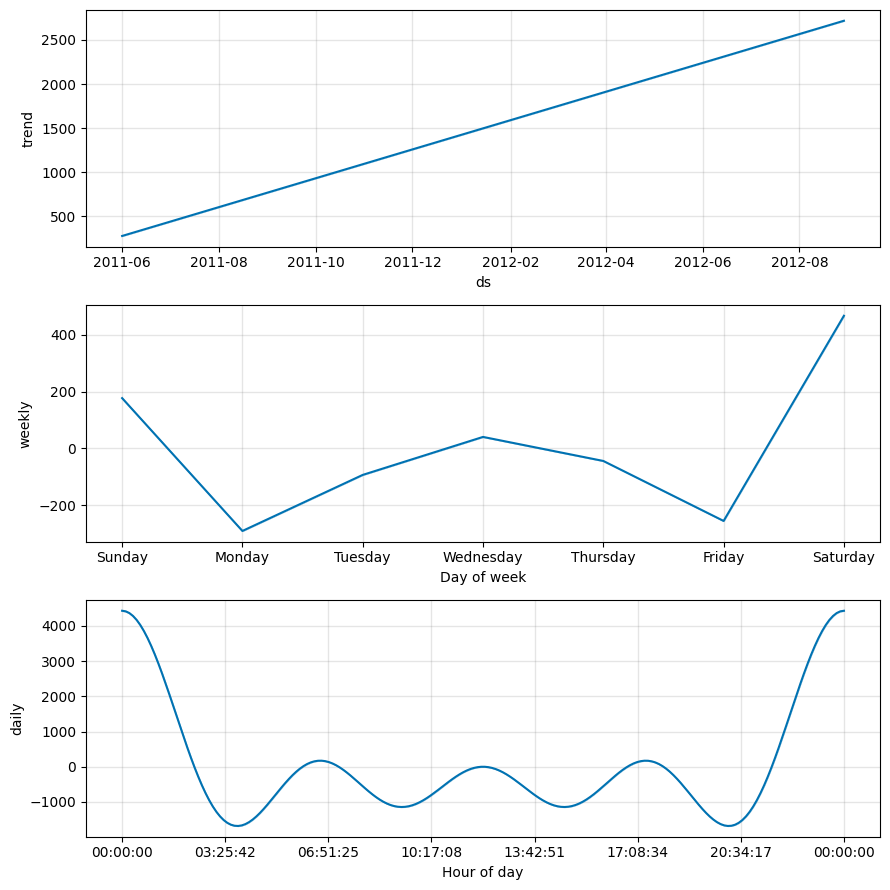

In [ ]:
sales_prediction(6,bike_sharing_daily, 60)

## Prediction with Holidays

In [ ]:
def sales_prediction(sales_df, holidays, periods):
  sales_df = sales_df[['dteday', 'cnt']].rename(columns = {'dteday': 'ds', 'cnt':'y'})
  sales_df = sales_df.sort_values('ds')

  model    = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='count')
  figure2  = model.plot_components(forecast)


In [ ]:
holidays = bike_sharing_daily[bike_sharing_daily['holiday'] == 1].loc[:, 'dteday'].values
holidays.shape

(21,)

In [ ]:
bike_sharing_daily['holiday'].value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [ ]:
holidays

array(['2011-01-17T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-04-15T00:00:00.000000000', '2011-05-30T00:00:00.000000000',
       '2011-07-04T00:00:00.000000000', '2011-09-05T00:00:00.000000000',
       '2011-10-10T00:00:00.000000000', '2011-11-11T00:00:00.000000000',
       '2011-11-24T00:00:00.000000000', '2011-12-26T00:00:00.000000000',
       '2012-01-02T00:00:00.000000000', '2012-01-16T00:00:00.000000000',
       '2012-02-20T00:00:00.000000000', '2012-04-16T00:00:00.000000000',
       '2012-05-28T00:00:00.000000000', '2012-07-04T00:00:00.000000000',
       '2012-09-03T00:00:00.000000000', '2012-10-08T00:00:00.000000000',
       '2012-11-12T00:00:00.000000000', '2012-11-22T00:00:00.000000000',
       '2012-12-25T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# create new holidays dataframe
holidays = pd.DataFrame({'ds': pd.to_datetime(holidays),
                               'holiday': 'state_holiday'})

In [ ]:
holidays.head()

,ds,holiday
0,2011-01-17,state_holiday
1,2011-02-21,state_holiday
2,2011-04-15,state_holiday
3,2011-05-30,state_holiday
4,2011-07-04,state_holiday


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprrr6_tny/b8x57jjf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprrr6_tny/bsepjy__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12428', 'data', 'file=/tmp/tmprrr6_tny/b8x57jjf.json', 'init=/tmp/tmprrr6_tny/bsepjy__.json', 'output', 'file=/tmp/tmprrr6_tny/prophet_modelmovyv15s/prophet_model-20230608163957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:39:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:39:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


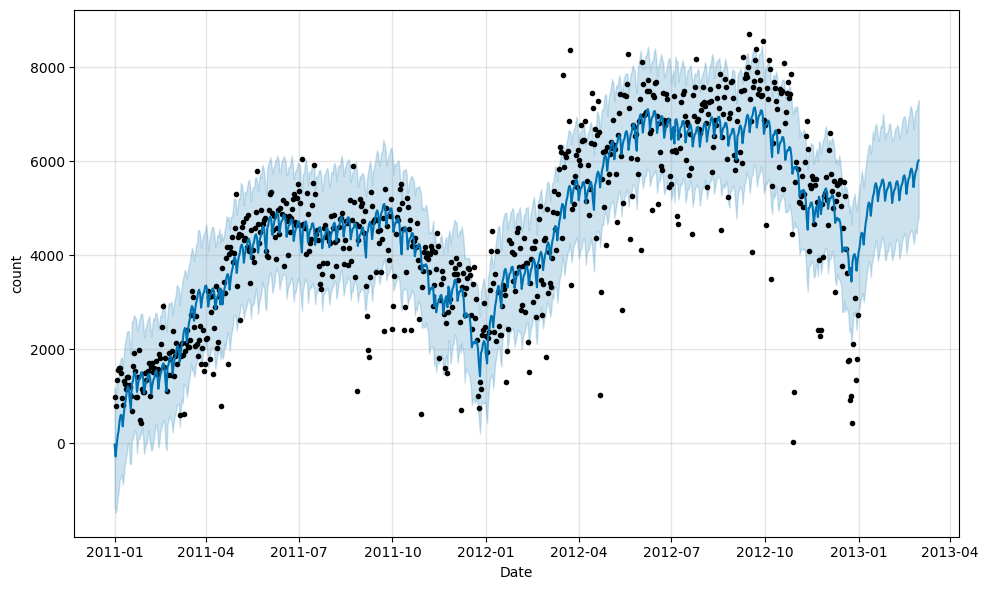

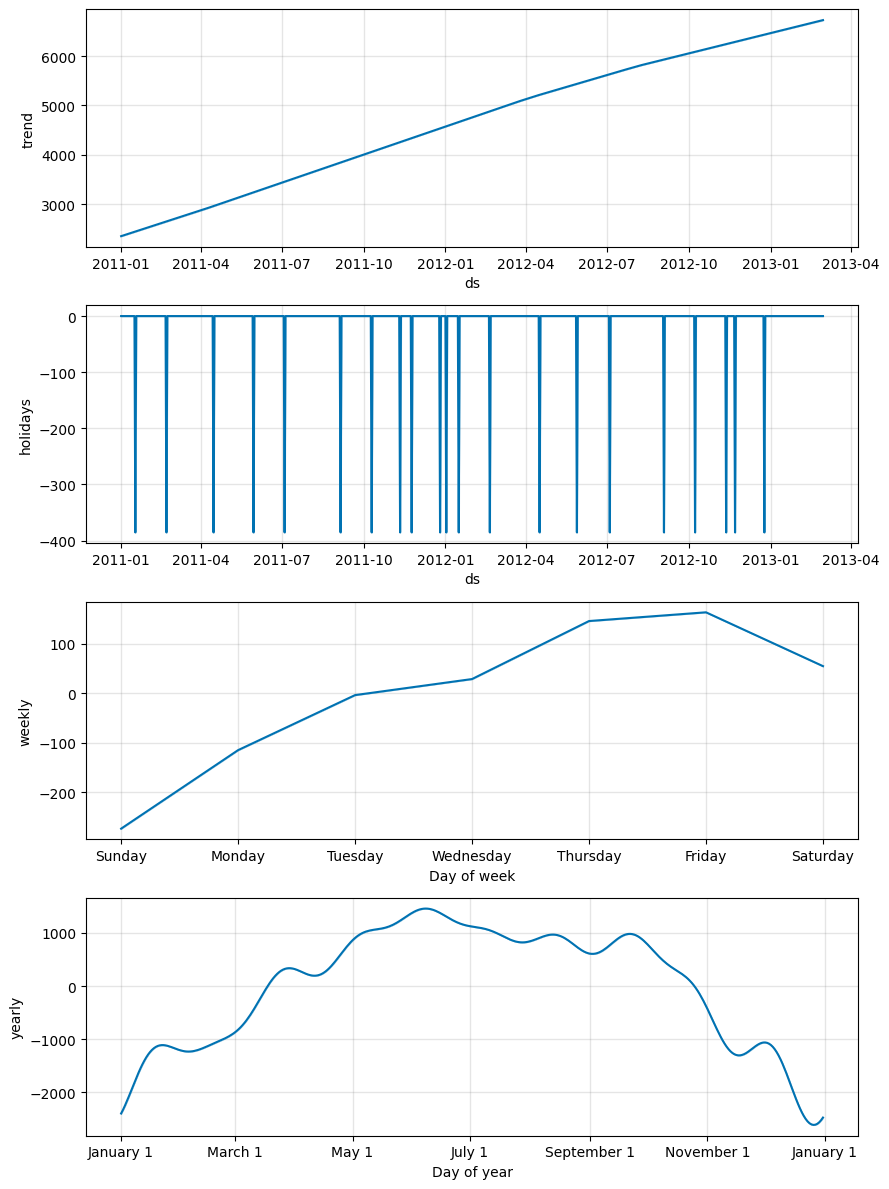

In [ ]:
sales_prediction(bike_sharing_daily, holidays, 60)

In [ ]:
len(bike_sharing_daily)

731

In [ ]:
bike_sharing_daily['year'].value_counts()

2012    366
2011    365
Name: year, dtype: int64

In [ ]:
# Train set
bike_train_df = bike_sharing_daily.loc[:671].copy(deep=True)
# Test set
bike_test_df = bike_sharing_daily.loc[671:].copy(deep=True)

In [ ]:
def sales_prediction(sales_df, periods):
  # Function that takes in the data frame, and number of future period forecast
  # The function then generates date/count columns in Prophet format
  # The function then makes time series predictions

  ## for prophet we rename the datetime column as 'ds' (represent on x-axis) and numerical column as 'y'.
  sales_df = sales_df[['dteday', 'cnt']].rename(columns = {'dteday': 'ds', 'cnt':'y'})
  sales_df = sales_df.sort_values('ds')

  # intialize model
  model = Prophet(daily_seasonality=True)
  # fit the df into model
  model.fit(sales_df)
  # we use 'make_future_dataframe' in-built function to create a future dates of particular periods i.e, 60 days
  future   = model.make_future_dataframe(periods=periods)
  # use predict method for prediction
  forecast = model.predict(future)
  # plot the model
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  ## plot the model to show weekly, yearly and daily prediction and trend line
  figure2  = model.plot_components(forecast)

In [ ]:
def bike_prediction(bike_train_df, periods):
  bike_train_df = bike_train_df[['dteday', 'cnt']].rename(columns = {'dteday': 'ds', 'cnt':'y'})
  bike_train_df = bike_train_df.sort_values('ds')
  model = Prophet(daily_seasonality=True)
  model.fit(bike_train_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel='Date', ylabel='Count')
  figure2 = model.plot_components(forecast)
  return forecast

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprrr6_tny/yt6uf84r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprrr6_tny/z_wh6eku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90608', 'data', 'file=/tmp/tmprrr6_tny/yt6uf84r.json', 'init=/tmp/tmprrr6_tny/z_wh6eku.json', 'output', 'file=/tmp/tmprrr6_tny/prophet_model60qk8awm/prophet_model-20230608164735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:47:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:47:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


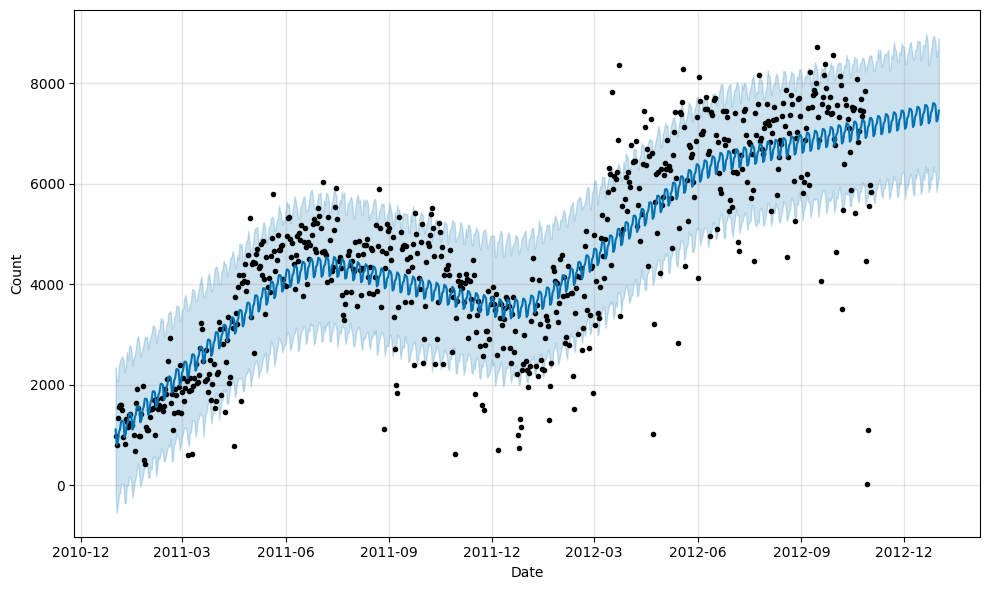

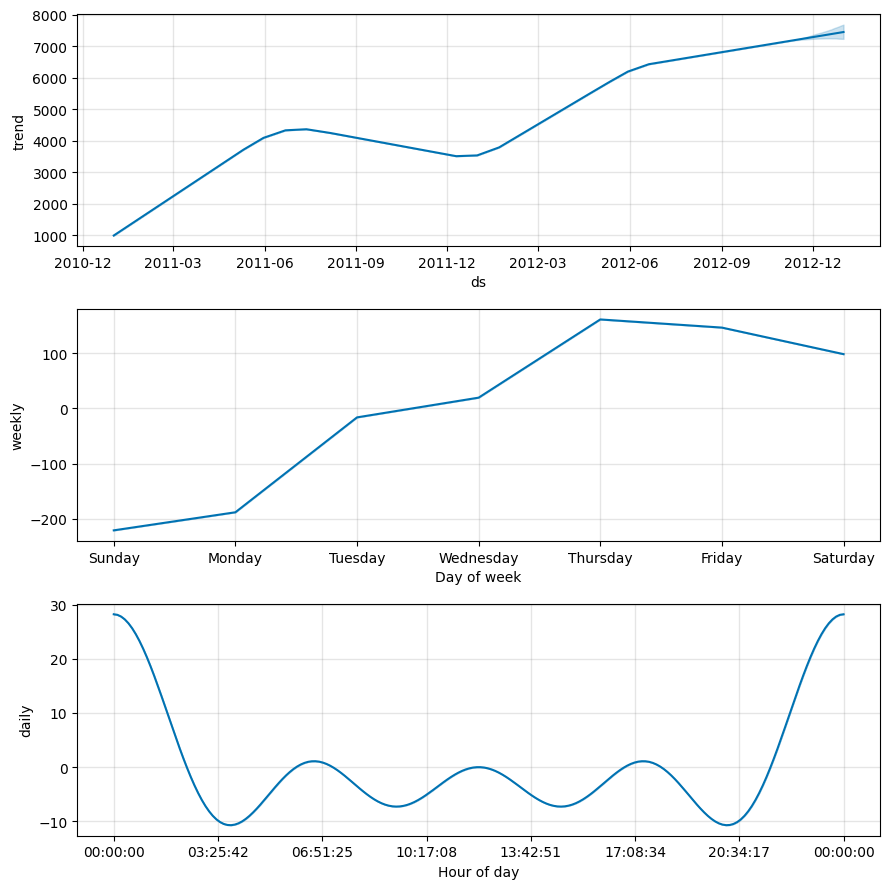

In [ ]:
bikeforecast1=bike_prediction( bike_train_df, 60)

## Prediction with holidays

In [ ]:
def bike_prediction_hol(bike_train_df, holidays,periods):
  bike_train_df = bike_train_df[['dteday', 'cnt']].rename(columns = {'dteday': 'ds', 'cnt':'y'})
  bike_train_df = bike_train_df.sort_values('ds')
  model = Prophet(holidays = holidays)
  model.fit(bike_train_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel='Date', ylabel='Count')
  figure2 = model.plot_components(forecast)
  return forecast

In [ ]:
# Get all the dates pertaining to school holidays
s_holidays = bike_train_df[bike_train_df['holiday'] == 1].loc[:, 'dteday'].values
s_holidays.shape

(18,)

In [ ]:
s_holidays = pd.DataFrame({'ds': pd.to_datetime(s_holidays),
'holiday': 's_holiday'})

In [ ]:
s_holidays

,ds,holiday
0,2011-01-17,s_holiday
1,2011-02-21,s_holiday
2,2011-04-15,s_holiday
3,2011-05-30,s_holiday
4,2011-07-04,s_holiday
5,2011-09-05,s_holiday
6,2011-10-10,s_holiday
7,2011-11-11,s_holiday
8,2011-11-24,s_holiday
9,2011-12-26,s_holiday


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprrr6_tny/85th7tyr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprrr6_tny/g_uqyekz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31622', 'data', 'file=/tmp/tmprrr6_tny/85th7tyr.json', 'init=/tmp/tmprrr6_tny/g_uqyekz.json', 'output', 'file=/tmp/tmprrr6_tny/prophet_modeljoxkixga/prophet_model-20230608165415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:54:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:54:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


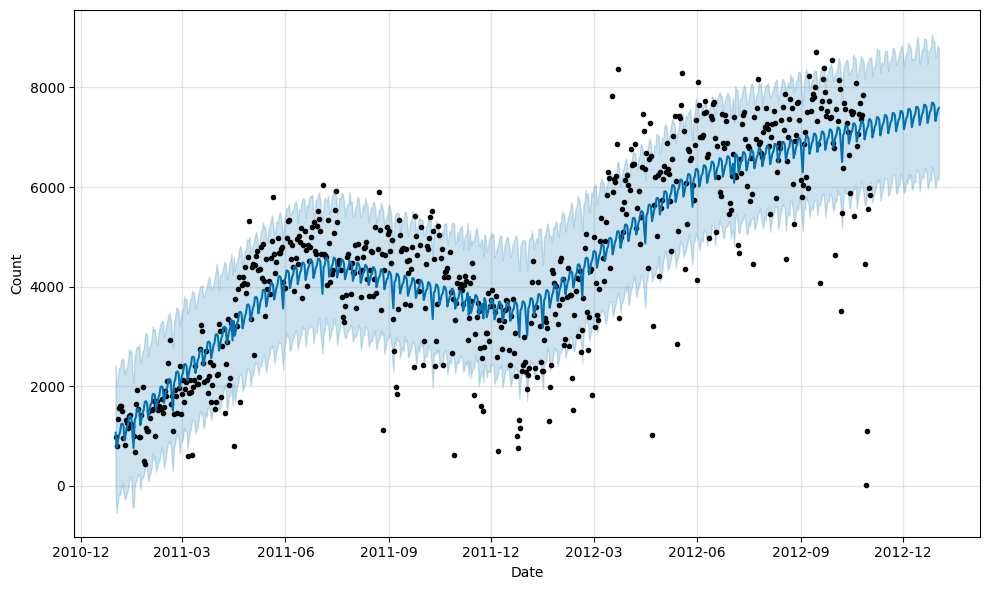

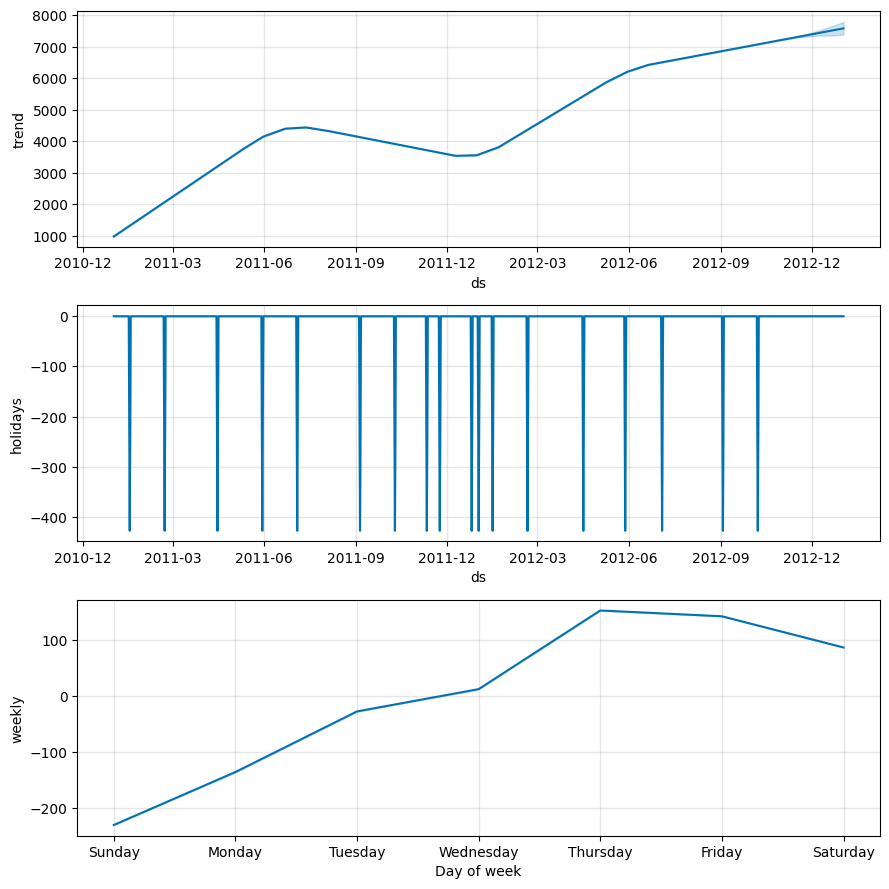

In [ ]:
bikeforecast2=bike_prediction_hol( bike_train_df,s_holidays, 61)

## Model Evaluation

In [ ]:
bikeforecast1.yhat.head()

0    1115.084654
1     816.528583
2     870.279190
3    1063.326024
4    1120.075628
Name: yhat, dtype: float64

In [ ]:
bike_inp_df=bike_test_df[['dteday','cnt']].copy()
bike_inp_df['dteday'] = pd.to_datetime(bike_inp_df['dteday'])
bike_inp_df = bike_inp_df.rename(columns={'dteday': 'ds'})

In [ ]:
bike_op_df1= bikeforecast1[['ds','yhat']].copy()
bike_op_df2= bikeforecast2[['ds','yhat']].copy()

In [ ]:
merged_df1 = pd.merge(bike_inp_df,bike_op_df1 , on='ds', how='inner')
merged_df2 = pd.merge(bike_inp_df,bike_op_df2 , on='ds', how='inner')

In [ ]:
from sklearn.metrics import mean_squared_error
rmse1 = np.sqrt(mean_squared_error(merged_df1.cnt, merged_df1.yhat))
print(f"Root Mean Squared Error (RMSE) for forecast1: {rmse1}")
rmse2 = np.sqrt(mean_squared_error(merged_df2.cnt, merged_df2.yhat))
print(f"Root Mean Squared Error (RMSE)for forecast2: {rmse2}")

Root Mean Squared Error (RMSE) for forecast1: 3245.218783911624
Root Mean Squared Error (RMSE)for forecast2: 3314.9317733415214


In [ ]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(merged_df1.cnt, merged_df1.yhat)
print(f"Mean Absolute Error (MAE)for forecast1: {mae1}")
mae2 = mean_absolute_error(merged_df2.cnt, merged_df2.yhat)
print(f"Mean Absolute Error (MAE)for forecast2: {mae2}")

Mean Absolute Error (MAE)for forecast1: 2804.7764703969715
Mean Absolute Error (MAE)for forecast2: 2881.9703955102846
